<a href="https://colab.research.google.com/github/Suraez/tensorflow-hands_on/blob/main/NLP/IMDB_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("hello")

hello


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/columbine/imdb-dataset-sentiment-analysis-in-csv-format'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: surajkumarojha
Your Kaggle Key: ··········


100%|██████████| 25.7M/25.7M [00:02<00:00, 11.8MB/s]


In [5]:
import pandas as pd
test_df = pd.read_csv('/content/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv')
train_df = pd.read_csv('/content/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv')
valid_df = pd.read_csv('/content/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv')

In [6]:
train_df.head(10)

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
5,A terrible movie as everyone has said. What ma...,0
6,Finally watched this shocking movie last night...,1
7,I caught this film on AZN on cable. It sounded...,0
8,It may be the remake of 1987 Autumn's Tale aft...,1
9,My Super Ex Girlfriend turned out to be a plea...,1


In [7]:
sorted_df = test_df.sort_values(by='label', inplace=False, ascending=False)

In [8]:
sorted_df

,text,label
2500,This movie was a brilliant concept. It was ori...,1
2040,I grew up in New York City and every afternoon...,1
3946,I've been wanting to see this movie for a very...,1
3945,This is the first review I've wrote for IMDb s...,1
2046,One can only imagine the film Mr. Welles might...,1
...,...,...
2184,It is beyond me why two million Danish people ...,0
2185,George Sluizer's original version of The Vanis...,0
2190,I'm not usually one to slate a film . I try to...,0
2191,"In the ravaged wasteland of the future, mankin...",0


In [9]:
test_df.shape

(5000, 2)

In [10]:
train_df.shape

(40000, 2)

In [11]:
valid_df.shape

(5000, 2)

###EDA

In [12]:
test_df['text'][1]

"1st watched 12/7/2002 - 3 out of 10(Dir-Steve Purcell): Typical Mary Kate & Ashley fare with a few more kisses. It looks to me like the girls are getting pretty tired of this stuff and it will be interesting what happens to them if they ever decide to split up and go there own ways. In this episode of their adventures they are interns in Rome for a `fashion' designer who puts them right into the mailroom to learn what working hard is all about(I guess..). Besides the typical flirtations with boys there is nothing much else except the Rome scenario until about ¾ way into the movie when it's finally revealed why they are getting fired, then re-hired, then fired again, then re-hired again. This is definetly made by people who don't understand the corporate world and it shows in their interpretation of it. Maybe the real world will be their next adventure(if there is one.). Even my kids didn't seem to care for this boring `adventure' in the make-believe. Let's see they probably only have 

In [13]:
reviews = test_df.text.str.cat(sep=' ')
print(len(test_df['text'][1] ))
print(len(reviews))
print(test_df['text'][1] in reviews)

1070
6577980
True


In [23]:
training_reviews = train_df.loc[:1000, 'text'].str.cat(sep=' ')

Tokenization

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(training_reviews)

In [ ]:
tokens

In [27]:
frequency_dist = nltk.FreqDist(tokens)
type(frequency_dist)

nltk.probability.FreqDist

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 151 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 145 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 149 missing from current font.
  font.set_text(s, 0, fla

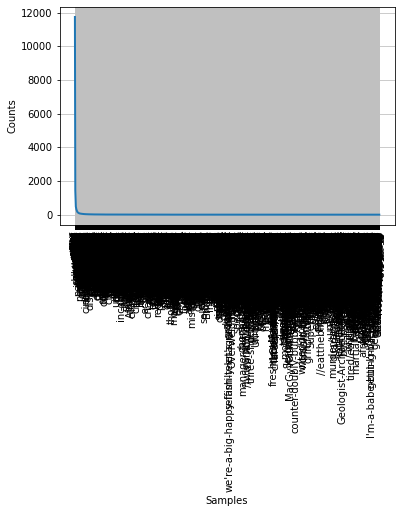

In [28]:
from matplotlib import pyplot as plt
nltk.FreqDist.plot(frequency_dist)
plt.show()

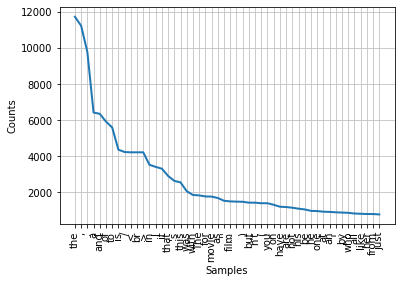

In [29]:
frequency_dist.plot(50, cumulative=False)
plt.show()

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [31]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
len(stopwords)

179

Removing stopwords from tokens

In [32]:
tokens = [w for w in tokens if w not in stopwords]

In [33]:
import string
tokens = [w for w in tokens if w not in string.punctuation]

In [ ]:
tokens

In [35]:
frequency_dist = nltk.FreqDist(tokens)

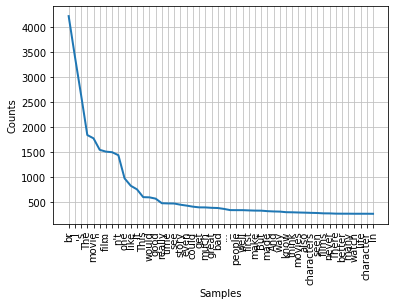

In [36]:
frequency_dist.plot(50, cumulative=False)
plt.show()

In [37]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


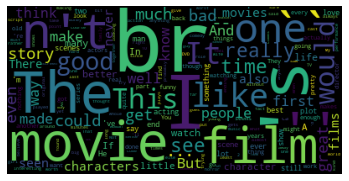

In [39]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=100)

wordcloud.generate_from_frequencies(frequency_dist)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

As you can see above , br is repeated so many times let's remove that

In [40]:
tokens = [w for w in tokens if w != 'br'] 

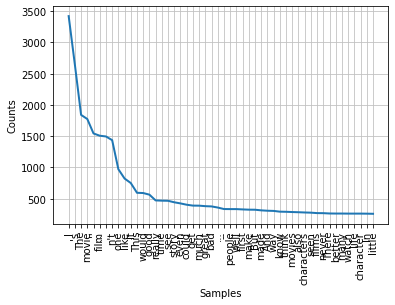

In [43]:
freqDist = nltk.FreqDist(tokens)
freqDist.plot(50, cumulative=False)
plt.show()

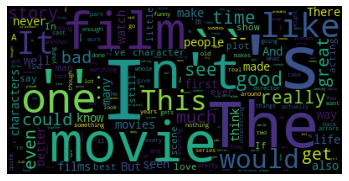

In [45]:
wordcloud.generate_from_frequencies(freqDist)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()